In [1]:
"""
GP emulation
"""
##### Packages ###############
import numpy as np  
import matplotlib.pylab as plt
import time
import pickle
import os
from sklearn.decomposition import PCA
# import GPy
import matplotlib.ticker as ticker
import gpflow


In [2]:
############################# PARAMETERS ##############################

dataDir = "./Data/" ## Data folder
modelDir = "./Models/" ## Data folder
plotsDir = "./Plots/" ## Data folder

nRankMax = [2, 4, 8, 12, 16, 32][4]  ## Number of basis vectors in truncated PCA
## Increasing nRankMax will increase emulation precision (asymptotically), but reduce the speed

del_idx = [5, 25, 4, 42]  ## Random holdouts (not used in training, reserved for validation) 
del_idx = [4]  ## Random holdouts (not used in training, reserved for validation) 
# del_idx = [11, 17, 20, 37, 46]  ## Random holdouts (not used in training, reserved for validation) 
# del_idx = [11, 5, 4, 42]  ## Random holdouts (not used in training, reserved for validation) 
# del_idx = []  ## Random holdouts (not used in training, reserved for validation) 

# 11, 17, 20, 37, 46, 
# DONOT use these: (array([22, 15, 19, 20, 35]), array([27, 34, 30, 29, 14])) -- edge cases
snap_ID = 98 #47


############################# PARAMETERS ##############################

dataDir = "./Data/Emulator213bins/" ## Data folder
fileIn = dataDir + 'ratiosbins_' + str(snap_ID) + '.txt'
paramIn = dataDir + 'mg.design'


dataDir = "./Data/Fixedn/" ## Data folder
fileIn = dataDir + 'ratiosbins_' + str(snap_ID) + '.txt'
paramIn = dataDir + 'mg_log.design'



# paramIn = dataDir + 'mg.design'
# fileIn = dataDir + ['ratios.txt', 'PMG.txt'][0]



# plotsDir = "./Plots/" ## Data folder
# dataDir = "./Data/Emulator_data/" ## Data folder
# dataDir = "./Data/Emulator213bins/" ## Data folder

# paramIn = dataDir + 'mg.design'  ## parameter file



az = np.loadtxt(dataDir + 'timestepsCOLA.txt', skiprows=1) 
fileIn = dataDir + 'ratiosbins_' + str(snap_ID) + '.txt'
fileIn = dataDir + 'ratiosbinsnew_' + str(snap_ID) + '.txt'

### GPmodel = modelDir + 'a89003GPflow_model_213Smooth_rank' + str(nRankMax) + 'snap' + str(snap_ID)  ## Double and single quotes are necessary
# GPmodel = modelDir + 'a89004GPflow_model_213Smooth_rank' + str(nRankMax) + 'snap' + str(snap_ID)  ## Double and single quotes are necessary
GPmodel = modelDir + 'fixedGP_smooth_rank' + str(nRankMax) + 'snap' + str(snap_ID)  ## Double and single quotes are necessary
PCAmodel = modelDir + 'fixedPCA_smooth_rank' + str(nRankMax) + 'snap' + str(snap_ID)  ## Double and single quotes are necessary

print(GPmodel)
################################# I/O #################################


./Models/fixedGP_smooth_rank16snap98


In [3]:
loadFile = np.loadtxt(fileIn)
PmPl_all = loadFile[:, 1:].T
kvals = loadFile[:,0]


parameter_array_all = np.loadtxt(paramIn)

In [4]:
loadFile = np.loadtxt(fileIn)
PmPl_all = loadFile[:, 1:].T
kvals = loadFile[:,0]


parameter_array_all = np.loadtxt(paramIn)


# ############## rescaling ##############


# def rescale01(f):
#     return np.min(f), np.max(f), (f - np.min(f)) / (np.max(f) - np.min(f))


# lhd = np.zeros_like(parameter_array_all)
# for i in range(parameter_array_all.shape[1]):
#     _, _, lhd[:, i] = rescale01(parameter_array_all[:, i])
   

# parameter_array_all = lhd

# # _,_,PmPl_all = rescale01(loadFile[:, 1:].T)









############## rescaling ##############


def rescale01(f):
    return np.min(f), np.max(f), (f - np.min(f)) / (np.max(f) - np.min(f))


def scale01(fmin, fmax, f):
    return (f - fmin) / (fmax - fmin)
#     return f*(fmax - fmin) + fmin


lhd = np.zeros_like(parameter_array_all)
lhdmin = np.zeros_like(parameter_array_all[1])
lhdmax = np.zeros_like(parameter_array_all[1])

for i in range(parameter_array_all.shape[1]):
    lhdmin[i], lhdmax[i], lhd[:, i] = rescale01(parameter_array_all[:, i])
   

parameter_array_all = lhd
np.savetxt(dataDir+'paralims.txt', np.array([lhdmin, lhdmax]))


############## rescaling ##############


## Removing hold-out test points
parameter_array = np.delete(parameter_array_all, del_idx, axis=0)
PmPl = np.delete(PmPl_all, del_idx, axis=0)



In [5]:
orig_param = np.loadtxt(paramIn)
print(np.argmin(orig_param, axis=0), np.argmax(orig_param, axis=0))
print(np.where(orig_param[:,3] == orig_param[:,3].min()))
print(np.where(orig_param[:, 3] < 1e-5))

[22 15 19 26 35] [27 34 30 23 14]
(array([26]),)
(array([ 0,  1,  2,  6,  7,  9, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       24, 25, 26, 27, 29, 30, 33, 34, 35, 36, 37, 38, 39, 40, 41, 44, 45,
       46, 47, 49]),)


In [6]:
np.min(np.loadtxt(paramIn), axis=0)

array([1.2e-01, 8.5e-01, 7.0e-01, 1.0e-08, 0.0e+00])

In [7]:
np.max(np.loadtxt(paramIn), axis=0)

array([1.55e-01, 1.05e+00, 9.00e-01, 1.00e-04, 4.00e+00])

In [8]:
np.savetxt(dataDir+'kvals.txt', kvals)

In [9]:
lhdmin, lhdmax = np.loadtxt(dataDir + 'paralims.txt')

In [10]:
#### adding smoothing filter ########

import scipy.signal
yhat = scipy.signal.savgol_filter(PmPl[:,:], 51, 3) # window size 51, polynomial order 3
y_train = yhat

####################################

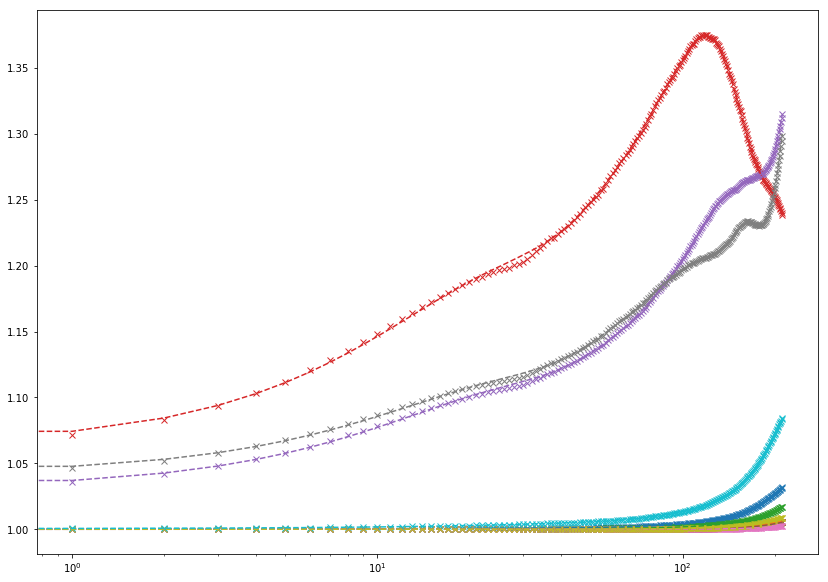

In [11]:
import scipy.signal

yhat = scipy.signal.savgol_filter(y_train, 51, 3) # window size 51, polynomial order 3


plt.figure(121, (14,10))
plt.plot( np.array(y_train).T[:,0:10], 'x')
plt.plot( np.array(yhat).T[:,0:10], '--')
plt.xscale('log')

In [12]:
############################# Plot the input parameter distribution ##############################

allLabels = [r'${\Omega}_m$', r'$n_s$', r'${\sigma}_8$', r'$f_{R_0}$', r'$n$']


lhd = np.zeros_like(parameter_array_all)
for i in range(parameter_array_all.shape[1]):
    _,_,lhd[:, i] = rescale01(parameter_array_all[:, i])
    
def plot_params(lhd):
    f, a = plt.subplots(lhd.shape[1], lhd.shape[1], sharex=True, sharey=True, figsize=(10, 10) )
    plt.suptitle('lhc design (rescaled parameters)', fontsize = 28)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
    plt.rcParams.update({'font.size': 8})

    for i in range(lhd.shape[1]):
        for j in range(i + 1):
            # print(i, j)
            if (i != j):
                a[i, j].scatter(lhd[:, i], lhd[:, j], s=5)
                a[i, j].grid(True)
            else:
                hist, bin_edges = np.histogram(lhd[:, i], density=True, bins=64)
                a[i, i].text(0.4, 0.4, allLabels[i], size = 'xx-large')

                a[i, i].bar(bin_edges[:-1], hist / hist.max(), width=0.2, alpha = 0.1)


    plt.show()


# plot_params(lhd)

In [13]:
########################### PCA ###################################
# set up pca compression
from sklearn.decomposition import PCA


def PCA_compress(x, nComp):
    # x is in shape (nparams, nbins)
    pca_model = PCA(n_components=nComp)
    principalComponents = pca_model.fit_transform(x)
    pca_bases = pca_model.components_

    print("original shape:   ", x.shape)
    print("transformed shape:", principalComponents.shape)
    print("bases shape:", pca_bases.shape)

    import pickle
    pickle.dump(pca_model, open(PCAmodel, 'wb'))

    return pca_model, np.array(principalComponents), np.array(pca_bases)


######################## GP FITTING ################################

## Build GP models
# This is evaluated only once for the file name. GP fitting is not required if the file exists.
  

def GPflow_fit(parameter_array, weights, fname= GPmodel):
    # kern = gpflow.kernels.Matern52(input_dim = np.shape(parameter_array)[1], ARD=True)
    kern = gpflow.kernels.Matern52(input_dim = np.shape(parameter_array)[1], ARD=False)
    # kern = gpflow.kernels.Matern12(input_dim = np.shape(parameter_array)[1], ARD=False)
    # kern = gpflow.kernels.RBF(input_dim = np.shape(parameter_array)[1], ARD=False)

#     m1 = GPy.models.GPRegression(parameter_array, weights, kernel=kern)
    m = gpflow.models.GPR(parameter_array, weights, kern=kern, mean_function=None)
#     print_summary(m)
    # m.likelihood.variance.assign(0.01)
    m.likelihood.variance.assign(1.0)

##     m.kern.lengthscales.assign([0.3, 0.1, 0.2, 0.3, 0.1])
    # m.kern.lengthscales.assign([25, 65, 15 ,1, 1])
    # m.kern.lengthscales.assign(0.5)
    
    opt = gpflow.train.ScipyOptimizer()
    opt.minimize(m)
    m.as_pandas_table()
    
    from pathlib import Path

    print(f'GPR lengthscales =', m.kern.lengthscales.value)

    
    path = Path(GPmodel)
    if path.exists():
        path.unlink()
    
    saver = gpflow.saver.Saver()
    saver.save(fname, m)
    



In [14]:
######################## GP PREDICTION FUNCTIONS ###############################


def GPy_predict(para_array):
    m1p = m1.predict_f(para_array)  # [0] is the mean and [1] the predictive
    W_predArray = m1p[0]
    W_varArray = m1p[1]
    return W_predArray, W_varArray


def Emu(para_array):
    if len(para_array.shape) == 1:
        W_predArray, _ = GPy_predict(np.expand_dims(para_array, axis=0))
        x_decoded = pca_model.inverse_transform(W_predArray)
        return np.squeeze(x_decoded)#[0]

def EmuPlusMinus(para_array):
    if len(para_array.shape) == 1:
        W_predArray, W_varArray = GPy_predict(np.expand_dims(para_array, axis=0))
        x_decoded = pca_model.inverse_transform(W_predArray)
        x_decoded_plus = pca_model.inverse_transform(W_predArray + np.sqrt(W_varArray))
        x_decoded_minus = pca_model.inverse_transform(W_predArray - np.sqrt(W_varArray))
        return np.squeeze(x_decoded), np.squeeze(x_decoded_plus), np.squeeze(x_decoded_minus)


In [15]:
# pca_model, pca_weights, pca_bases = PCA_compress(PmPl, nComp=nRankMax)
pca_model, pca_weights, pca_bases = PCA_compress(y_train, nComp=nRankMax)

print('----------------')
print(parameter_array.shape)
print(pca_weights.shape)
print('----------------')

GPflow_fit(parameter_array, pca_weights)

original shape:    (49, 213)
transformed shape: (49, 16)
bases shape: (16, 213)
----------------
(49, 5)
(49, 16)
----------------






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -55.232179
  Number of iterations: 13
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -55.232179
  Number of iterations: 13
  Number of functions evaluations: 16
GPR lengthscales = 1.696431044523523


In [16]:
PmPl_all.max(), PmPl_all.min()

(1.72185171, 0.99932582)

In [17]:
GPmodel

'./Models/fixedGP_smooth_rank16snap98'

[0.14, 1.0, 0.7, 1e-05, 1.0]
[0.57142857 0.75       0.         0.09990999 0.25      ]
Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().
Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().


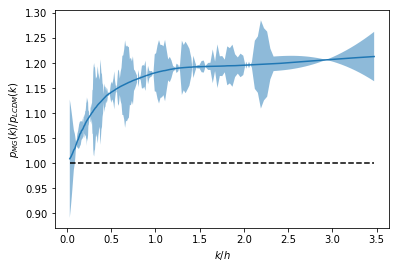

In [18]:
# par = [0.136512329, 0.971, 0.82, 1e-06, 1]
# 11, 17, 20, 37, 46
# params = np.loadtxt(paramIn)

ctx_for_loading = gpflow.saver.SaverContext(autocompile=False)
saver = gpflow.saver.Saver()

m1 = saver.load(GPmodel, context=ctx_for_loading)
m1.clear()
m1.compile()

pca_model = pickle.load(open(PCAmodel, 'rb'))



params = np.loadtxt(paramIn)
params.min()
par = params[46]
# par = [1.46428570e-01, 9.56122398e-01, 8.14285755e-01, 2.05061588e-06, 8.16328004e-02] #params[11]
par = [0.14, 1.0, 0.7, 1e-5, 1.0] #params[11]

scaled_par = scale01(lhdmin, lhdmax, par)
print(par)
print( (scaled_par))

# x_id = 46
# 
# 

# print( params[np.argmin(params[:,3])])
# print(parameter_array_all[x_id])
plt.figure(12)
Emu(scaled_par)
# plt.plot(kvals, Emu(scaled_par))
plt.plot(kvals, EmuPlusMinus(scaled_par)[0])
plt.fill_between(kvals, EmuPlusMinus(scaled_par)[1], EmuPlusMinus(scaled_par)[2], alpha = 0.5)
plt.plot(kvals, np.ones_like(kvals), 'k--')

plt.ylabel(r'$p_{MG}(k)/p_{LCDM}(k)$')
plt.xlabel(r'$k/h$')

plt.show()

In [19]:
# def EmuM(gpmodel, pcamodel, para_array):
#     para_array = np.array(para_array)
#     # print(para_array)
#     para_array_rescaled = scale01(lhdmin, lhdmax, para_array)
#     if len(para_array.shape) == 1:
#         # print(para_array_rescaled)
#         W_predArray, _ = GPy_predict(gpmodel, np.expand_dims(para_array_rescaled, axis=0))
#         x_decoded = pcamodel.inverse_transform(W_predArray)
#         return np.squeeze(x_decoded)#[0]


# def GPy_predict(para_array):
#     m1p = m1.predict_f(para_array)  # [0] is the mean and [1] the predictive
#     W_predArray = m1p[0]
#     W_varArray = m1p[1]
#     return W_predArray, W_varArray


# def Emu(para_array):
#     if len(para_array.shape) == 1:
#         W_predArray, _ = GPy_predict(np.expand_dims(para_array, axis=0))
#         x_decoded = pca_model.inverse_transform(W_predArray)
#         return np.squeeze(x_decoded)#[0]


In [20]:
# m1 = GPmodel
# Emu(np.array(scaled_par))
# EmuM(m1, pca_model, np.array(par))

Time per emulation 1.18986  s


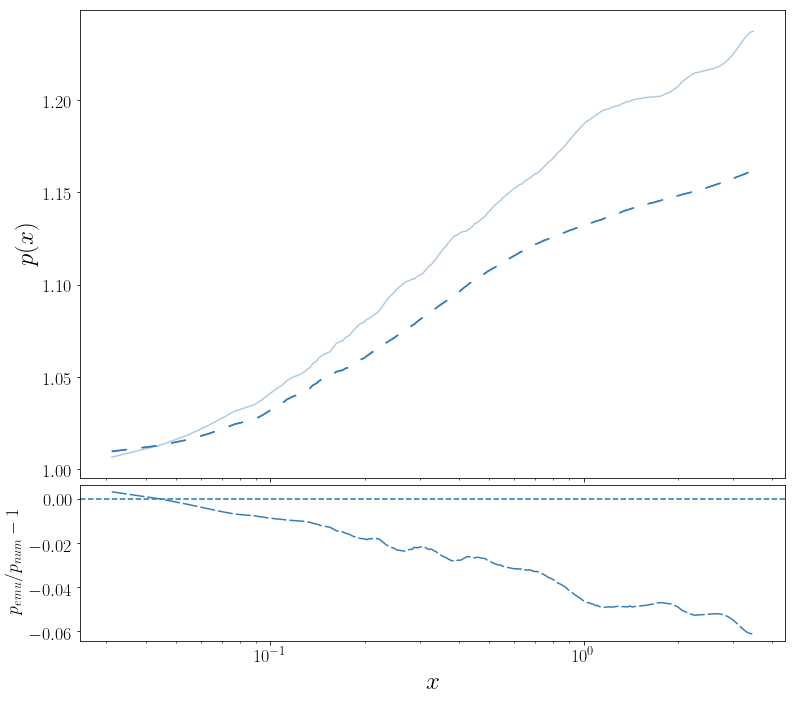

In [21]:
#### GP POSTERIOR DRAWS and PCA RECONSTRUCTIONS ######

# m1 = GPy.models.GPRegression.load_model(modelDir + 'GPy_model_rank' +str(nRankMax)+ '.zip')
# pca_model = pickle.load(open(modelDir + 'PCA_model_rank'+str(nRankMax), 'rb'))

# m1 = GPy.models.GPRegression.load_model(modelDir + 'GPy_model'+ str(nRankMax) +'.zip')
# m1 = GPy.models.GPRegression.load_model(GPmodel + '.zip')

ctx_for_loading = gpflow.saver.SaverContext(autocompile=False)
saver = gpflow.saver.Saver()

m1 = saver.load(GPmodel, context=ctx_for_loading)
m1.clear()
m1.compile()

pca_model = pickle.load(open(PCAmodel, 'rb'))

plt.rc('text', usetex=True)  # Slower
plt.rc('font', size=18)  # 18 usually

plt.figure(999, figsize=(14, 12))
from matplotlib import gridspec

gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
gs.update(hspace=0.02, left=0.2, bottom=0.15)
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

ax0.set_ylabel(r'$p(x)$', fontsize=25)
ax1.set_xlabel(r'$x$', fontsize=25)
ax1.set_ylabel(r'$p_{emu}/p_{num} - 1$', fontsize = 18)
# ax1.set_ylim(-5e-2, 5e-2)

ax0.set_xscale('log')
# ax0.set_yscale('log')
ax1.set_xscale('log')

ax1.axhline(y=0, ls='dashed')

color_id = 0
del_idx = [4]
for x_id in del_idx:
    color_id = color_id + 1
    time0 = time.time()
#     x_decoded_new = Emu(parameter_array_all[x_id], PCAmodel='PCA_model', GPmodel='GPy_model')
    x_decoded_new = Emu(parameter_array_all[x_id])
    x_decoded_smooth = scipy.signal.savgol_filter(x_decoded_new , 51, 6)
    
    # ax0.plot(kvals, EmuPlusMinus(parameter_array_all[x_id])[0])
    # ax0.fill_between(kvals, EmuPlusMinus(parameter_array_all[x_id])[1], EmuPlusMinus(parameter_array_all[x_id])[2], alpha = 0.5)

    time1 = time.time()
    print('Time per emulation %0.5f' % (time1 - time0), ' s')
    ax0.plot(kvals, x_decoded_new, alpha=1.0, lw = 1.5, ls='--', label='emu', dashes=(10, 10), color=plt.cm.Set1(color_id))
    ax0.plot(kvals, x_decoded_smooth, alpha=1.0, lw = 1.5, ls='--', label='emu', dashes=(10, 10), color=plt.cm.Set1(color_id))

#     x_test = PmPl_all[x_id]
    x_test = scipy.signal.savgol_filter(PmPl_all[x_id], 51, 6)

    ax0.plot(kvals, x_test, alpha=0.4, label='real', color=plt.cm.Set1(color_id))

    ax1.plot(kvals, (x_decoded_smooth / (x_test) ) - 1, ls='--', dashes=(10, 2), color=plt.cm.Set1(color_id))


ax0.set_xticklabels([])
plt.savefig(plotsDir + 'Pemu_rank' +str(nRankMax) + '.png', figsize=(28, 24), bbox_inches="tight")
plt.show()

Time per emulation 1.16520  s


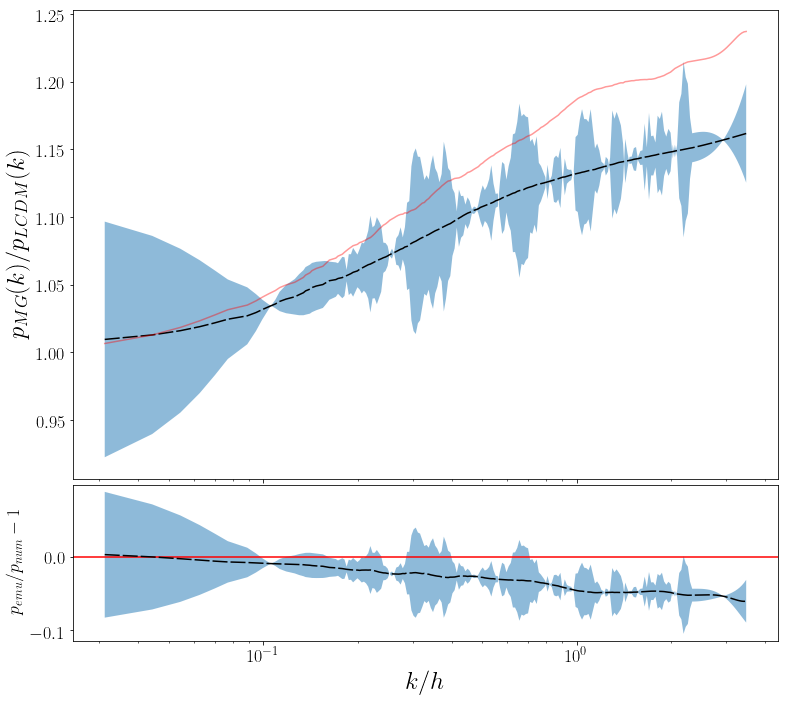

In [22]:
#### GP POSTERIOR DRAWS and PCA RECONSTRUCTIONS ######

# m1 = GPy.models.GPRegression.load_model(modelDir + 'GPy_model_rank' +str(nRankMax)+ '.zip')
# pca_model = pickle.load(open(modelDir + 'PCA_model_rank'+str(nRankMax), 'rb'))

# m1 = GPy.models.GPRegression.load_model(modelDir + 'GPy_model'+ str(nRankMax) +'.zip')
# m1 = GPy.models.GPRegression.load_model(GPmodel + '.zip')

ctx_for_loading = gpflow.saver.SaverContext(autocompile=False)
saver = gpflow.saver.Saver()

m1 = saver.load(GPmodel, context=ctx_for_loading)
m1.clear()
m1.compile()

pca_model = pickle.load(open(PCAmodel, 'rb'))

plt.rc('text', usetex=True)  # Slower
plt.rc('font', size=18)  # 18 usually

plt.figure(999, figsize=(14, 12))
from matplotlib import gridspec

gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
gs.update(hspace=0.02, left=0.2, bottom=0.15)
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

ax0.set_ylabel(r'$p(x)$', fontsize=25)
ax1.set_xlabel(r'$x$', fontsize=25)
ax1.set_ylabel(r'$p_{emu}/p_{num} - 1$', fontsize = 18)
# ax1.set_ylim(-5e-2, 5e-2)

ax0.set_xscale('log')
# ax0.set_yscale('log')
ax1.set_xscale('log')

ax1.axhline(y=0, color = 'r')

color_id = 0
del_idx = [4]
for x_id in del_idx:
    color_id = color_id + 1
    time0 = time.time()
    x_decoded_new = Emu(parameter_array_all[x_id])
    x_decoded_smooth = scipy.signal.savgol_filter(x_decoded_new , 51, 6)
    
    ax0.plot(kvals, EmuPlusMinus(parameter_array_all[x_id])[0], ls='--', dashes=(10, 2), color='k')
    ax0.fill_between(kvals, EmuPlusMinus(parameter_array_all[x_id])[1], EmuPlusMinus(parameter_array_all[x_id])[2], alpha = 0.5)

    time1 = time.time()
    print('Time per emulation %0.5f' % (time1 - time0), ' s')
    # ax0.plot(kvals, x_decoded_new, alpha=1.0, lw = 1.5, ls='--', color = 'k', label='emu', dashes=(10, 10))
    # ax0.plot(kvals, x_decoded_smooth, alpha=1.0, lw = 1.5, ls='--', color = 'r', label='emu', dashes=(10, 10))

#     x_test = PmPl_all[x_id]
    x_test = scipy.signal.savgol_filter(PmPl_all[x_id], 51, 6)

    # ax0.plot(kvals, x_test, alpha=0.4, label='real', color=plt.cm.Set1(color_id))
    ax0.plot(kvals, x_test, alpha=0.4, label='real', color='red')

    ax1.plot(kvals, (x_decoded_smooth / (x_test) ) - 1, ls='--', dashes=(10, 2), color='k')
    ax1.fill_between(kvals, (EmuPlusMinus(parameter_array_all[x_id])[1]/ (x_test) ) - 1, (EmuPlusMinus(parameter_array_all[x_id])[2]/ (x_test) ) - 1, alpha = 0.5)


ax0.set_ylabel(r'$p_{MG}(k)/p_{LCDM}(k)$')
ax1.set_xlabel(r'$k/h$')

ax0.set_xticklabels([])
plt.savefig(plotsDir + 'uq_Pemu_rank' +str(nRankMax) + '.png', figsize=(28, 24), bbox_inches="tight")
plt.show()

In [23]:
params = np.loadtxt(paramIn)
params.min()

0.0

[0.140000015, 1.00918353, 0.773469388, 1.13183784e-06, 1.093877602]
[0.571429   0.79591765 0.36734694 0.0112195  0.2734694 ]


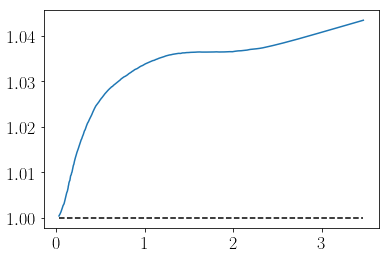

In [24]:
# par = [0.136512329, 0.971, 0.82, 1e-06, 1]
# 11, 17, 20, 37, 46
# params = np.loadtxt(paramIn)
par = params[46]
# par = [1.46428570e-01, 9.56122398e-01, 8.14285755e-01, 2.05061588e-06, 8.16328004e-02] #params[11]
par = [1.40000015e-01, 1.00918353e+00, 7.73469388e-01, 1.13183784e-06, 1.093877602e+00] #params[11]

scaled_par = scale01(lhdmin, lhdmax, par)
print(par)
print( (scaled_par))

# x_id = 46
# 
# 

# print( params[np.argmin(params[:,3])])
# print(parameter_array_all[x_id])
plt.figure(12)
Emu(scaled_par)
plt.plot(kvals, Emu(scaled_par))
plt.plot(kvals, np.ones_like(kvals), 'k--')
plt.show()

sample emulated value: [1.04389693 1.04940295 1.05453886 1.05931849 1.0637557  1.06786431
 1.07165818 1.07515114 1.07835703 1.08128969 1.08396297 1.08639071
 1.08858675 1.09056493 1.09233908 1.09392306 1.0953307  1.09657584
 1.09767233 1.09863401 1.09947471 1.10020828 1.10084856 1.10140939
 1.10190461 1.10234807 1.10262327 1.10292115 1.10382383 1.10418021
 1.10457318 1.1059267  1.10730906 1.10872919 1.10978534 1.11101261
 1.11254881 1.11348462 1.11380187 1.11495265 1.11623766 1.11721038
 1.11833309 1.11936454 1.1204414  1.12132177 1.12266606 1.12422464
 1.12502382 1.1260422  1.12705334 1.12814411 1.12890846 1.12952757
 1.1314217  1.13208145 1.13404759 1.13607598 1.1378081  1.13865961
 1.13956926 1.14092516 1.1421762  1.14301812 1.14431966 1.14535845
 1.14646887 1.14765475 1.14913504 1.15018838 1.15150544 1.15275221
 1.15355472 1.15493632 1.15654458 1.15751407 1.15930688 1.16080455
 1.16258431 1.16379313 1.16537003 1.16721646 1.16874114 1.16974751
 1.17066309 1.17186903 1.17355735 1.174

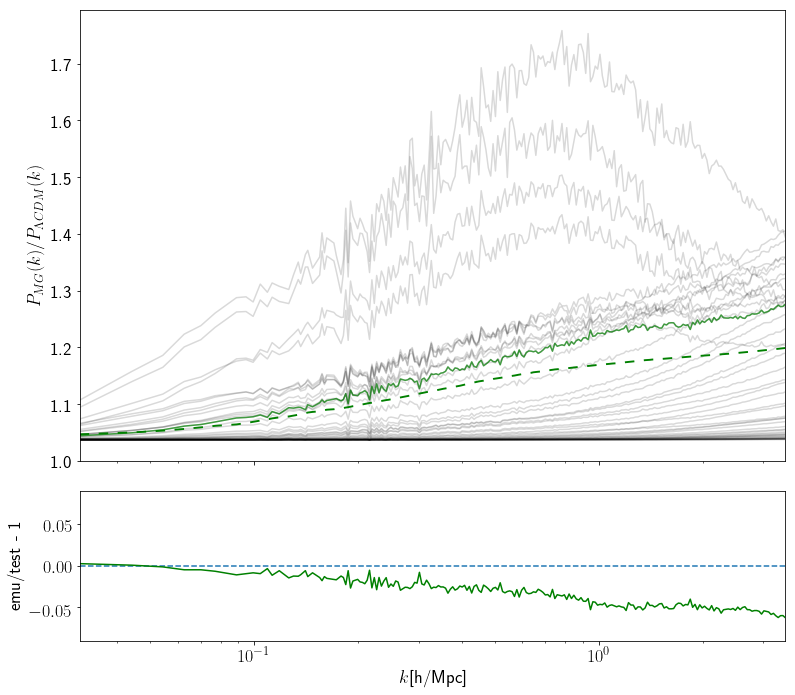

In [25]:
#### GP POSTERIOR DRAWS and PCA RECONSTRUCTIONS ######

## Both models below have to be loaded -- one for GP and one for PCA
# m1 = GPy.models.GPRegression.load_model(modelDir + 'GPy_model' + str(nRankMax) + '.zip')
# m1 = GPy.models.GPRegression.load_model(GPmodel + '.zip')

pca_model = pickle.load(open(PCAmodel , 'rb'))


## Calling the Emulator function with 5 arguements [Om, ns, sigma8, fR0, n]

print('sample emulated value:', Emu(np.array([1, 1, 1, 1, 1]) ) )
print(50*'=')

#########################################################

colorList = ['r', 'g', 'k', 'b', 'brown', 'orange', 'purple', 'darkslateblue', 'darkkhaki']

plt.rc('text', usetex=True)  # Slower
plt.rc('font', size=18)  # 18 usually


plt.figure(999, figsize=(14, 12))
from matplotlib import gridspec

gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
gs.update(hspace=0.1, left=0.2, bottom=0.15, wspace=0.25)
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

ax0.set_ylabel(r'$P_{MG}(k)/P_{{\Lambda}CDM}(k)$')
ax1.set_xlabel(r'$k$[h/Mpc]')
ax1.axhline(y=0, ls='dashed')

# ax0.set_yscale('log')
ax0.set_xscale('log')
ax1.set_xscale('log')

ax1.set_ylabel(r'emu/test - 1')

ax0.plot(kvals, PmPl_all.T, alpha=0.15, color='k')


ax0.set_xlim(kvals[0], kvals[-1])
ax1.set_xlim(kvals[0], kvals[-1])
ax1.set_ylim(-9e-2, 9e-2)

# del_idx = [0, 1, 2, 5, 6, 7, 8]
color_id = 0
for x_id in del_idx:
    print(x_id)
    color_id = color_id + 1
    time0 = time.time()
    x_decodedGPy = Emu(parameter_array_all[x_id])  ## input parameters
    time1 = time.time()
    print('Time per emulation %0.4f' % (time1 - time0), ' s')
    x_test = PmPl_all[x_id]

    ax0.plot(kvals, x_decodedGPy, alpha=1.0, ls='--', lw = 1.9, dashes=(5, 5), label='emu', color=colorList[color_id])
    ax0.plot(kvals, x_test, alpha=0.7, label='test', color=colorList[color_id])
    ax1.plot( kvals, (x_decodedGPy[:]) / (x_test[:])  - 1, color=colorList[color_id])
    
start, end = ax0.get_ylim()
ax0.yaxis.set_ticks((np.arange(start, end, 0.1)))
ax0.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))


ax0.set_xticklabels([])
plt.savefig(plotsDir + 'MGemu_rank' +str(nRankMax) + '.png', figsize=(28, 24), bbox_inches="tight")
plt.show()



In [26]:
######### TEMPLATE FOR MCMC LIKELIHOOD FUNCTION #######################
# For emcee

def lnlike(theta, x, y, yerr):
    p1, p2, p3, p4 = theta
    new_params = np.array([p1, p2, p3, p4])    

    model = Emu(new_params)
    return -0.5 * (np.sum(((y - model) / yerr) ** 2.))


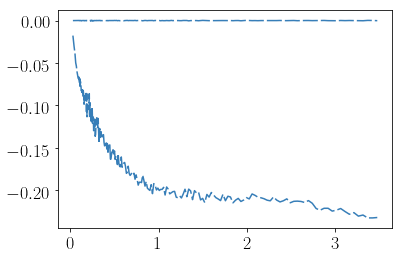

In [27]:
# pca_recon1 = np.matmul(pca_weights, pca_bases)
# pca_recon = pca_model.inverse_transform(pca_weights)
# W_predArray, _ = GPy_predict(np.expand_dims(para_array, axis=0))

test_idx = [5, 2]
for x_id in test_idx:
#     x_pca_recon = np.matmul(pca_weights, pca_bases)
    para_array = parameter_array_all[x_id]
    W_predArray, _ = GPy_predict(np.expand_dims(para_array, axis=0))
    
#     x_emu_recon = pca_model.inverse_transform(W_predArray)
    x_pca_recon = pca_model.inverse_transform(pca_weights)

    x_test = PmPl_all[x_id]
    
#     plt.plot(kvals, (x_emu_recon[0]) / (x_test) - 1, ls=':', color=plt.cm.Set1(color_id))
    plt.plot(kvals, (x_pca_recon[x_id]) / (x_test) - 1, ls='--', dashes=(10, 2), color=plt.cm.Set1(color_id))

#     plt.plot(kvals, (x_test) , ls='-', color=plt.cm.Set1(color_id))
#     plt.plot(kvals, x_pca_recon[x_id], ls='--', dashes=(10, 2), color=plt.cm.Set1(color_id))
#     plt.scatter((W_predArray[0]), pca_weights[x_id])

plt.show()


[0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1.]
[0.49812576 0.49979172 0.50770505 0.11686    0.50395671]
0
1
2
3
4


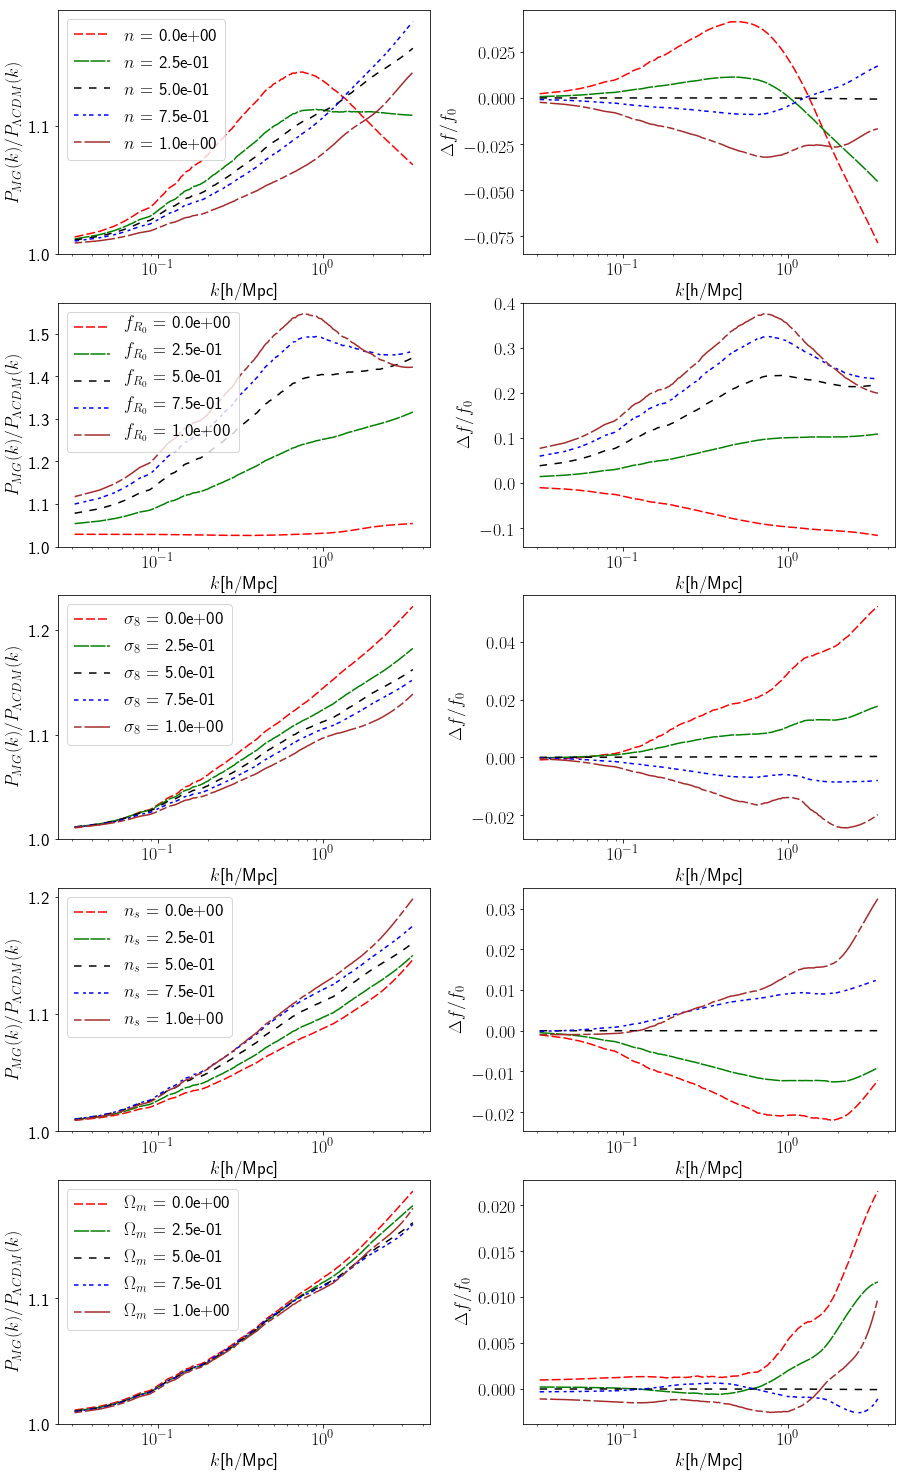

In [28]:
from itertools import cycle
import matplotlib.ticker as ticker

allMax = np.max(parameter_array, axis = 0)
allMin = np.min(parameter_array, axis = 0)
allMean = np.mean(parameter_array, axis = 0)

#allMean = 0.5*(allMax - allMin)

print(allMin)
print(allMax)
print(allMean)
Pk_mean = Emu(allMean) 


PlotCls = True

numPlots = 5

fig, ax = plt.subplots(5,2, figsize = (15,26))
# fig = plt.figure()
# fig.add_subplot(221)   #top left
# fig.add_subplot(222)   #top right
# fig.add_subplot(223)   #bottom left
# fig.add_subplot(224)   #bottom right
# plt.show()
plt.subplots_adjust(wspace=0.25)

if PlotCls:
    for paramNo in range(5):
        print(paramNo)
        para_range = np.linspace(allMin[paramNo], allMax[paramNo], numPlots)

        #plt.figure(32)
        lines = ["-","-.","--",":"]
        linecycler = cycle(lines)
        dashList = [(6,2),(10,1),(5,5),(3,3,2,2),(5,2,20,2)]
        colorList = ['r', 'g', 'k', 'b', 'brown']


        for plotID in range(numPlots):
            para_plot = np.copy(allMean)
            para_plot[paramNo] = para_range[plotID]  #### allMean gets changed everytime!!
            x_decodedGPy = Emu(para_plot) 
            lineObj = ax[4-paramNo,0].plot(kvals, x_decodedGPy, lw= 1.5, linestyle='--', dashes=dashList[plotID], color = colorList[plotID], label = allLabels[paramNo] + ' = %.1e'%para_range[plotID])
            #ax[paramNo,0].set_ylim(9.9, None)
            #ax[4-paramNo,0].set_yscale('log')
            ax[4-paramNo,0].set_xscale('log')
            ax[4-paramNo,0].set_ylabel(r'$P_{MG}(k)/P_{{\Lambda}CDM}(k)$')
            ax[4-paramNo,0].set_xlabel('$k$[h/Mpc]')
            #ticks = np.linspace(np.min(10**x_decodedGPy), np.max(10**x_decodedGPy), 5)
            #ticks = np.array([10, 15, 20, 25, 30, 35, 40])
            #ax[4-paramNo,0].set_yticks(ticks, minor = True)
            ax[4-paramNo,0].set_yticks([], minor = True)
            ax[4-paramNo,0].legend(iter(lineObj), para_range.round(decimals=2), title = allLabels[paramNo])
            ax[4-paramNo,0].legend()
            #ax[paramNo,0].legend(title = allLabels[paramNo])
            #ax[paramNo,1].set_yscale('log')
            ax[4-paramNo,1].set_xscale('log')
            ax[4-paramNo,1].set_ylabel(r'$\Delta f / f_0$')
            ax[4-paramNo,1].set_xlabel('$k$[h/Mpc]')
            #ax[paramNo,0].legend(iter(lineObj), para_range.round(decimals=2), title = allLabels[paramNo])
            #ax[paramNo,0].legend(title = allLabels[paramNo])
            ax[4-paramNo,1].plot(kvals, (x_decodedGPy)/(Pk_mean) - 1, lw= 1.5, linestyle='--', dashes=dashList[plotID], color = colorList[plotID], label = para_range[plotID] )


        start, end = ax[4-paramNo, 0].get_ylim()
        ax[4-paramNo, 0].yaxis.set_ticks( (np.arange(start, end, 0.1)))
        ax[4-paramNo, 0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))


fig.savefig(plotsDir + "sensitivity_snap" + str(snap_ID) + ".png",  bbox_inches="tight", dpi=200)

plt.show()




In [29]:
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook, output_file
from bokeh.plotting import figure
output_notebook()

x = kvals
y = Emu(parameter_array_all[x_id])#/(Pk_mean) - 1 


# p = figure(title="emulated P(k) ratio", plot_height=500, plot_width=600, y_range=(1,1.8), background_fill_color='white')
p = figure(title="emulated P(k) ratio", plot_height=500, plot_width=600, background_fill_color='white')

r = p.line(x, y, color='black', line_width=1.5, alpha=0.8)

p1min, p2min, p3min, p4min, p5min = parameter_array_all.min(axis = 0)
p1max, p2max, p3max, p4max, p5max = parameter_array_all.max(axis = 0)
p1mean, p2mean, p3mean, p4mean, p5mean = parameter_array_all.mean(axis = 0)

def update(p1=p1mean , p2= p2mean, p3=p3mean, p4=p4mean, p5=p5mean):
#     if   f == "sin": func = np.sin
#     elif f == "cos": func = np.cos
    r.data_source.data['y'] = Emu(np.array([p1, p2, p3, p4, p5]))#/Pk_mean - 1
    push_notebook()
    
    

show(p, notebook_handle=True)


interact(update, p1=(p1min,p1max), p2=(p2min,p2max), p3=(p3min, p3max), p4 = (p4min, p4max), p5 = (p5min, p5max))

# output_file( modelDir + "emu.html")


Loading BokehJS ...

interactive(children=(FloatSlider(value=0.4999999840000001, description='p1', max=1.0), FloatSlider(value=0.49…

<function __main__.update(p1=0.4999999840000001, p2=0.4999999684, p3=0.49999993190000014, p4=0.11661723082928199, p5=0.5000000164270001)>